#### Coding Exercise: Derivative of the postsynaptic potential alpha function

This code simulates the derivative of the postsynaptic potential (PSP) using an alpha function, which is commonly used to model the dynamics of synaptic currents in neuroscience. In the context of a neuron, the PSP represents the voltage change in a postsynaptic neuron due to synaptic input.The alpha function represents the postsynaptic potential over time in response to a neurotransmitter pulse. The equation for the alpha function is:

\begin{equation}
f(t) = t \cdot \text{exp}\left( -\frac{t}{\tau} \right)
\end{equation}

The derivative of the alpha function describes how quickly the synaptic current is changing at any given point in time. This is important because it helps us understand how quickly a neuron will respond to input and how the current evolves after a stimulus is applied.

The time constant ($\tau$) controls the rate of decay of the alpha function. It determines how quickly the postsynaptic potential changes after a stimulus. A smaller tau results in a faster response and decay.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
t = np.arange(0, 10, .1)  # Time vector from 0 to 10 seconds with a step of 0.1 seconds
tau = 0.5  # Time constant (in seconds)

In [5]:
f = t * np.exp(-t/tau)  # Alpha function: f(t) = t * exp(-t / tau)

In [6]:
u_t = t
v_t = np.exp(-t/tau)

In [7]:
du_dt = 1
dv_dt = -1/tau * np.exp(-t/tau)

In [9]:
df_dt = u_t * dv_dt + v_t * du_dt

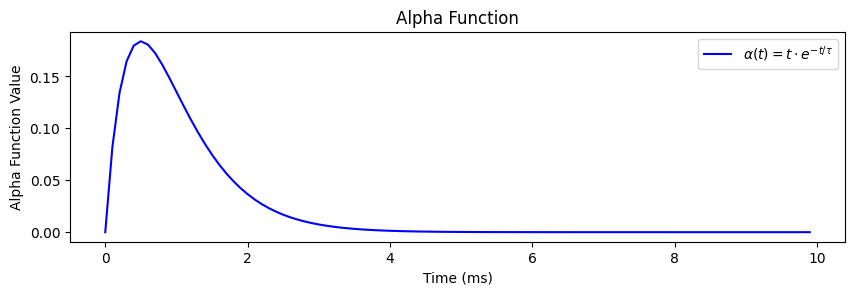

In [10]:
plt.figure(figsize=(10, 6))

# Alpha function plot
plt.subplot(2, 1, 1)
plt.plot(t, f, label=r'$\alpha(t) = t \cdot e^{-t/\tau}$', color='blue')
plt.xlabel('Time (ms)')
plt.ylabel('Alpha Function Value')
plt.title('Alpha Function')
plt.legend()

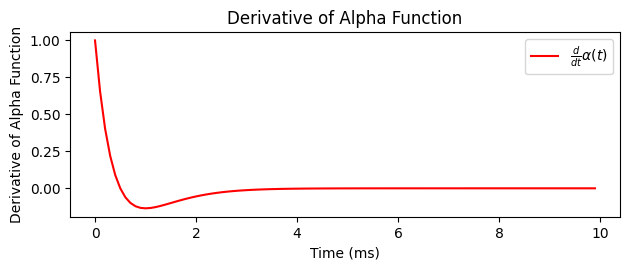

In [11]:
# Derivative of the alpha function plot
plt.subplot(2, 1, 2)
plt.plot(t, df_dt, label=r"$\frac{d}{dt} \alpha(t)$", color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Derivative of Alpha Function')
plt.title('Derivative of Alpha Function')
plt.legend()

plt.tight_layout()
plt.show()

the alpha function and its derivative provide valuable insights into the temporal dynamics of synaptic currents and help us model and understand how neurons process information over time.

#### Calculating the Transfer Function and Gain of a Neuron

Transfer Function of a Neuron
The transfer function of a neuron describes how the input current (or synaptic input) is transformed into the output firing rate of the neuron. It essentially represents the relationship between the stimulus (input current) and the neuron's response (firing rate).

For a typical neuron, the transfer function is non-linear and can often be modeled by a sigmoid function. The sigmoid function is commonly used because it captures the neuron’s threshold behavior: neurons don't respond to small inputs but begin to fire rapidly when a certain threshold is exceeded.

Mathematical Form of the Transfer Function:
The transfer function of a neuron is usually written as:
$$
\text{rate}(I) = \frac{1}{1 + \exp\left(-a \cdot (I - \theta)\right)}
$$

Where:
- I is the input current (the amount of excitatory or inhibitory input to the neuron).
- θ is the threshold value of the input current, below which the neuron does not fire or fires very weakly.
- 𝑎 is the steepness parameter, determining how quickly the firing rate changes with respect to the input current.
At low input values, the neuron fires very little, but as the input current approaches the threshold, the firing rate increases rapidly. After exceeding the threshold, the neuron’s firing rate levels off and becomes relatively stable.

Gain of a Neuron
The gain of a neuron measures how much the neuron's output (firing rate) changes in response to a change in its input current. In other words, it quantifies the sensitivity of the neuron’s firing rate to variations in the input.

In mathematical terms, gain is typically defined as the derivative of the neuron's firing rate with respect to the input current:
$$
\text{Gain}(I) = \frac{d(rate)}{dI}
$$
The gain can tell you how responsive a neuron is to changes in the input. For example:

- High gain means that small changes in input current result in large changes in the firing rate.
- Low gain means that the firing rate is relatively insensitive to changes in the input current.

How Gain is Related to the Transfer Function:
For a sigmoid-shaped transfer function:
$$
\text{rate}(I) = \frac{1}{1 + \exp\left(-a \cdot (I - \theta)\right)}
$$
The gain is the derivative of the rate function:
$$
\text{Gain}(I) = \frac{d}{dI} \left( \frac{1}{1 + \exp(-a \cdot (I - \theta))} \right)
$$

After taking the derivative, we get:
$$
\text{Gain}(I) = a \cdot \frac{\exp(-a \cdot (I - \theta))}{\left( 1 + \exp(-a \cdot (I - \theta)) \right)^2}
$$

This gain function is highest when the input 𝐼 is near the threshold 𝜃, meaning the neuron is most sensitive to input changes around its firing threshold. The gain decreases as 𝐼 moves far from the threshold (either very high or very low).

In [35]:
def compute_rate_and_gain(I, a, theta, current_timestep):
  # Compute rate
  rate = (1 + np.exp(-a * (I - theta)))**-1 - (1 + np.exp(a * theta))**-1

  # Compute gain using a numerical derivative
  gain = (rate[1:] - rate[0:-1]) / current_timestep

  return rate, gain

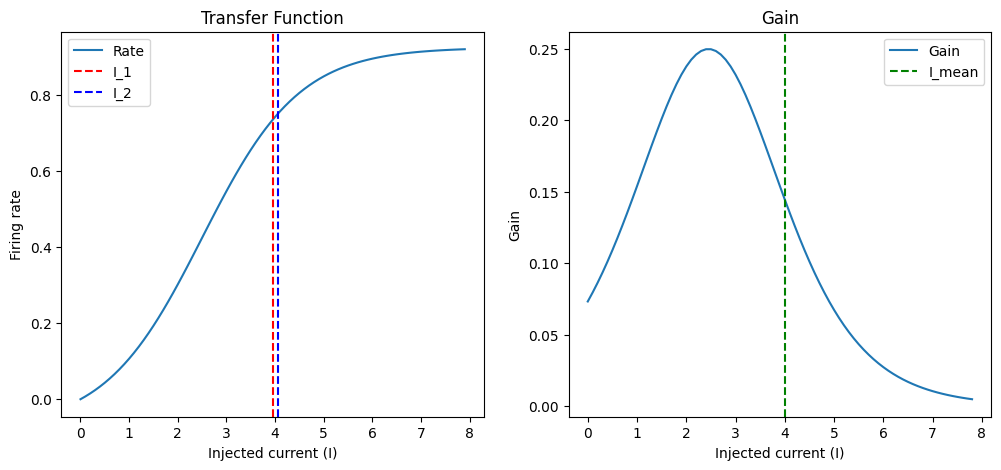

In [33]:
def plot_rate_and_gain(a, theta, I_mean):
    current_timestep = 0.1
    I = np.arange(0, 8, current_timestep) # Compute rate and gain
    rate, gain = compute_rate_and_gain(I, a, theta, current_timestep)

    # Compute values for I_mean
    I_1 = I_mean - current_timestep / 2
    I_2 = I_mean + current_timestep / 2
    rate_1 = (1 + np.exp(-a * (I_1 - theta)))**-1 - (1 + np.exp(a * theta))**-1
    rate_2 = (1 + np.exp(-a * (I_2 - theta)))**-1 - (1 + np.exp(a * theta))**-1

    input_range = I_2 - I_1
    output_range = rate_2 - rate_1

    # Plot rate
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(I, rate, label='Rate')
    plt.axvline(I_1, color='red', linestyle='--', label='I_1')
    plt.axvline(I_2, color='blue', linestyle='--', label='I_2')
    plt.xlabel('Injected current (I)')
    plt.ylabel('Firing rate')
    plt.title('Transfer Function')
    plt.legend()

    # Plot gain
    plt.subplot(1, 2, 2)
    plt.plot(I[:-1], gain, label='Gain')
    plt.axvline(I_mean, color='green', linestyle='--', label='I_mean')
    plt.xlabel('Injected current (I)')
    plt.ylabel('Gain')
    plt.title('Gain')
    plt.legend()

    plt.show()

# Parameters
a = 1.0      # Steepness parameter
theta = 2.5  # Threshold parameter
I_mean = 4.0 # Mean input current

# Generate plots
plot_rate_and_gain(a, theta, I_mean)

##### Biological Significance of Transfer Function and Gain
1. Transfer Function:
-  The transfer function is essential for understanding how neurons process synaptic inputs and convert them into action potentials (spikes). The sigmoid curve captures the threshold behavior of neurons — they only respond to inputs above a certain threshold, reflecting the nonlinear nature of neuronal response.
-  The neuron might require a certain level of input before it responds effectively, which is fundamental in signal integration, processing, and encoding in the brain.
2. Gain:
-  The gain of a neuron is important because it determines the precision and sensitivity of the neuron’s response to input. A high gain means that the neuron is highly sensitive to small changes in the input current, which is crucial for functions like sensory processing where precise responses to small changes are required.
-  Conversely, a neuron with low gain might be less responsive to subtle changes, possibly involved in tasks that require less sensitivity to noise or smaller changes in input.
  
Transfer function: Describes the relationship between the input current and the firing rate of a neuron. Gain: Describes how sensitive the neuron’s firing rate is to changes in input current, often reflecting how responsive the neuron is to synaptic activity.

- Sensory Neurons: High gain is important for neurons in sensory systems (e.g., vision, hearing) that need to detect small changes in input signals.
- Motor Control: For neurons controlling movement, a moderate gain might be useful for maintaining stable outputs.
- Neuroplasticity: Gain modulation is also a key concept in understanding neuroplasticity—how the brain adjusts its responsiveness over time based on experience and learning.